In [9]:
include("../mps.jl")
using .MatrixProductState
using LinearAlgebra

using Plots

In [77]:
r = 18

psi_complex = rand(ComplexF32, (2 for _=1:r)...)
psi_complex /= norm(psi_complex)

psi_real = rand(Float64, (2 for _=1:r)...)
psi_real /= norm(psi_real);

In [78]:
# TODO: update with contraction method
function mps_and_contract(psi, bond_dim)
    sites = MatrixProductState.mps(psi, bond_dim)
    axis_dim = div(length(sites[2]), 2)
    intermediate = reshape(sites[2], axis_dim, 2) * sites[1]
    for i = 2:r-2
                axis_dim = size(sites[i+1])[3]
                left_axis_dim = div(length(sites[i+1]), axis_dim)
                right_axis_dim = div(length(intermediate), axis_dim)
                intermediate =
                    reshape(sites[i+1], left_axis_dim, axis_dim) *
                    reshape(intermediate, axis_dim, right_axis_dim)
            end
    A_mps = sites[r] * reshape(intermediate, 2, 2^(r - 1))
    return abs(dot(A_mps, conj(psi)))
end

mps_and_contract (generic function with 1 method)

Float32[0.86610353, 0.8659956, 0.86582476, 0.8655288, 0.86522156, 0.8649634, 0.86403537, 0.85811365, 0.8410301, 0.8042609, 0.7602133, 0.74984765, 0.74984765]

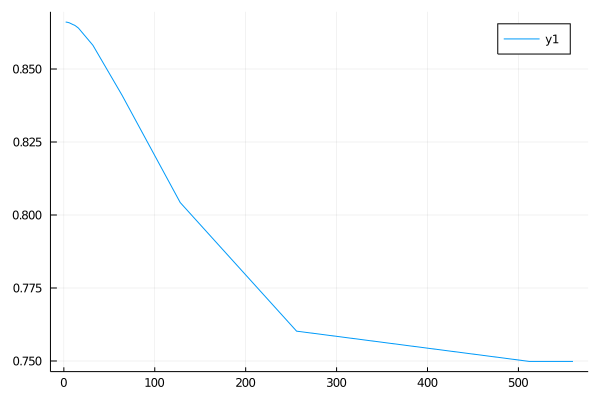

In [84]:
bond_dims = [2, 4, 6, 8, 10, 12, 16, 32, 64, 128, 256, 512, 560]
complex_fidelities = map(chi->mps_and_contract(psi_complex, chi),
                         bond_dims)
print(complex_fidelities)
plot(bond_dims, complex_fidelities) # Uh oh!!

[0.8657456336374653, 0.8658260065619345, 0.8660222723402564, 0.8662654102653561, 0.8665398673084179, 0.8670296038279316, 0.8679314787965511, 0.8737238229834221, 0.8913998954357516, 0.9326991946097187, 0.9866259150435639, 0.999999999999998, 0.999999999999998]

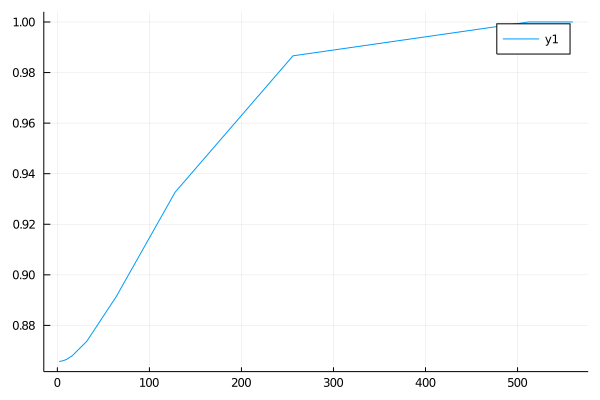

In [85]:
real_fidelities = map(chi->mps_and_contract(psi_real, chi),
                      bond_dims)
print(real_fidelities)
plot(bond_dims, real_fidelities)